In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Mount Google Drive
# Required if working with files stored in Google Drive
drive.mount('/content/drive')

Mounted at /content/drive



Strong correlations (abs(correlation) >= 0.7):
sum_monthly_cash_transaction_amount -- avg_monthly_cash_transaction_amount: 0.813
max_monthly_cash_transaction_amount -- avg_monthly_cash_transaction_amount: 0.957
max_monthly_cash_transaction_amount -- sum_monthly_cash_transaction_amount: 0.891
sum_monthly_cross_border_transaction_amount -- avg_monthly_cross_border_transaction_amount: 0.881
max_monthly_cross_border_transaction_amount -- avg_monthly_cross_border_transaction_amount: 0.931
max_monthly_cross_border_transaction_amount -- sum_monthly_cross_border_transaction_amount: 0.963


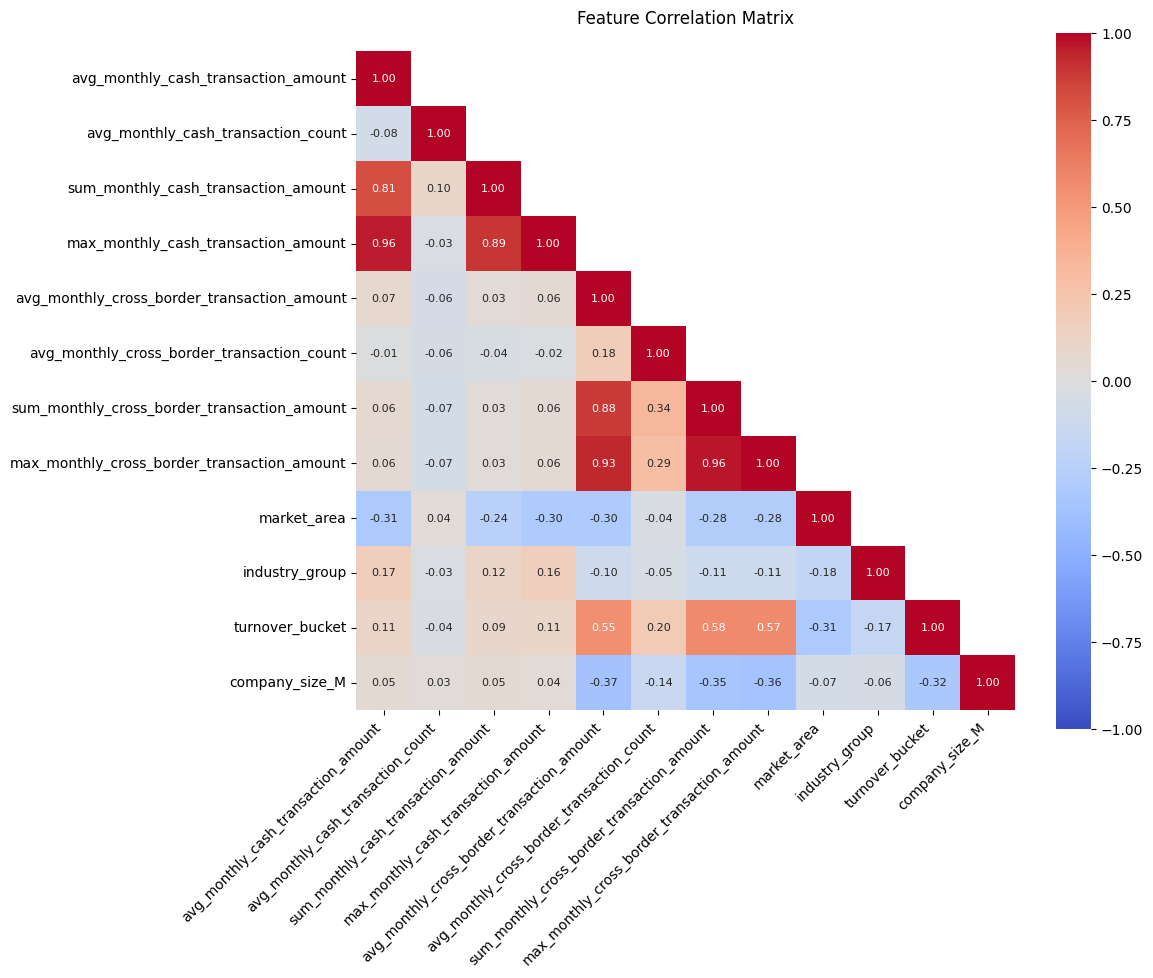

In [ ]:
def plot_correlation_matrix(data, figsize=(12, 10), mask_upper=True, cmap='coolwarm',
                          annotate=True, fmt='.2f', fontsize=8):
    """
    Plot a correlation matrix for all features in the dataset.

    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing both numerical and categorical features
    figsize : tuple, optional (default=(12, 10))
        Figure size for the plot
    mask_upper : bool, optional (default=True)
        If True, masks the upper triangle of the correlation matrix
    cmap : str, optional (default='coolwarm')
        Color map to use for the heatmap
    annotate : bool, optional (default=True)
        If True, adds correlation values as annotations
    fmt : str, optional (default='.2f')
        Format string for correlation values
    fontsize : int, optional (default=8)
        Font size for annotations

    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    ax : matplotlib.axes.Axes
        The created axes object
    """
    # Calculate correlation matrix
    corr_matrix = data.corr()

    # Create mask for upper triangle if requested
    mask = np.zeros_like(corr_matrix)
    if mask_upper:
        mask[np.triu_indices_from(mask, k=1)] = True

    # Create figure and axes
    fig, ax = plt.subplots(figsize=figsize)

    # Create heatmap
    sns.heatmap(corr_matrix,
                mask=mask if mask_upper else None,
                cmap=cmap,
                vmin=-1, vmax=1,
                center=0,
                square=True,
                annot=annotate,
                fmt=fmt,
                annot_kws={'size': fontsize},
                ax=ax)

    # Customize the plot
    plt.title('Feature Correlation Matrix', pad=20)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    return fig, ax

def analyze_correlations(data, threshold=0.7):
    """
    Analyze and print strong correlations in the dataset.

    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing features to analyze
    threshold : float, optional (default=0.7)
        Correlation coefficient threshold to identify strong correlations
    """
    # Calculate correlation matrix
    corr_matrix = data.corr()

    # Find strong correlations
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                strong_corr.append({
                    'feature1': corr_matrix.index[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })

    # Print results
    if strong_corr:
        print(f"\nStrong correlations (abs(correlation) >= {threshold}):")
        for corr in strong_corr:
            print(f"{corr['feature1']} -- {corr['feature2']}: {corr['correlation']:.3f}")
    else:
        print(f"\nNo correlations found above threshold of {threshold}")

plot_correlation_matrix(X, figsize=(12, 10), mask_upper=True, cmap='coolwarm',
                          annotate=True, fmt='.2f', fontsize=8)

analyze_correlations(X, threshold=0.7)